## Seizure Diary Notebook
 Import Modules

 Parse Seizure Diary File and plot data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import ipywidgets as widgets
import warnings
def multi(a, b, c, d, f, g):
    
    # Read the data
    df = pd.read_csv('Pruned_When-Did-I.csv', index_col=2, parse_dates=True)
    df = df.loc[df['Note'] != "NHNN VT"]  # Exclude certain rows

    # Identify occurrences of 'drug changes'
    specific_action_df = df[df['Action'] == 'Change Cenobamate']
    specific_action_df1 = df[df['Action'] == 'Change Vimpat dose']
    specific_action_df2 = df[df['Action'] == 'Reduce my lamotrogine last']
    specific_action_df3 = df[df['Action'] == 'Reduce Clobazam']
    specific_action_df4 = df[df['Action'] == 'Need Rescue meds']
    specific_action_df5 = df[df['Action'] == 'Change Perampanel ']
    
    # Identify occurrences of seizure types
    types = list(b)
    df = df[df['Action'].isin(types)]

    # Convert the datetime column to a pandas datetime object
    df['datetime'] = df.index
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek

    # Filter by date range
    startdate = pd.to_datetime(a)
    enddate = pd.to_datetime(c)
    df = df[(df['datetime'] >= startdate) & (df['datetime'] < enddate)]

    # Create a complete range of periods
    if d == 'Weekly':
        period_freq = 'W'
        label_format = '%b %Y'  # Month Year format
    elif d=='Monthly':
        period_freq = 'M'
        label_format = '%b %Y'
    elif d=='Daily':
        period_freq = 'D'
        label_format = '%b %Y'

    all_periods = pd.period_range(start=startdate, end=enddate, freq=period_freq)

    # Group the data by period
    df['period'] = df['datetime'].dt.to_period(freq=period_freq)
    grouped = df.groupby('period').apply(lambda x: np.histogram(x['hour'], bins=range(25))[0])
    grouped_df = pd.DataFrame(grouped.tolist(), index=grouped.index)

    # Merge with the complete periods
    complete_grouped_df = grouped_df.reindex(all_periods, fill_value=0)

    # Visualization
    fig = plt.figure(figsize=(12, 9))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 4], width_ratios=[20, 1])

    # Axes for the histogram
    ax0 = plt.subplot(gs[0, 0])

    # Axes for the heatmap
    ax1 = plt.subplot(gs[1, 0])

    # Axes for the colorbar (aligned with the heatmap)
    ax2 = plt.subplot(gs[1, 1])

    # Plotting Histogram for Counts
    ax0.bar(complete_grouped_df.index.astype(str), complete_grouped_df.sum(axis=1), color='blue')
    ax0.set_title(f'{d} Seizure Count')
    ax0.set_xticklabels([])  # Remove x-tick labels
    ax0.set_ylabel('Count')
    ax0.set_xlim([-0.5, len(complete_grouped_df.index) - 0.5])  # Align x-axis with heatmap

    # Plot Heatmap

    im = ax1.imshow(complete_grouped_df.T, aspect='auto', cmap='viridis',vmin=-0, vmax=3)  # Transpose the DataFrame
    ax1.set_title(f'{d} Seizure Counts by Hour of Day')
    ax1.set_xlabel('Period')


    # Only label the first week of each month
    if d == 'Weekly':
        labels = [''] * len(all_periods)
        previous_month = None
        for i, period in enumerate(all_periods):
            if period.month != previous_month:
                labels[i] = period.strftime('%b %Y')
                previous_month = period.month
    else:  # If it's monthly, label each month
        labels = [period.strftime('%b %Y') for period in all_periods]

    ax1.set_xticks(np.arange(len(all_periods)))
    ax1.set_xticklabels(labels, rotation=90)
    ax1.set_ylabel('Hour of Day')
    index=[]

    # add datetime to spec actions
    specific_action_df['datetime'] = specific_action_df.index
    specific_action_df1['datetime'] = specific_action_df1.index
    specific_action_df2['datetime'] = specific_action_df2.index
    specific_action_df3['datetime'] = specific_action_df3.index
    specific_action_df4['datetime'] = specific_action_df4.index
    specific_action_df5['datetime'] = specific_action_df5.index

    # Add a new column for period index
    def get_period_index(date):
        period = date.to_period(freq=period_freq)
        if period in all_periods:
            return np.where(all_periods == period)[0][0]
        else:
            return None

    specific_action_df['period_index'] = specific_action_df['datetime'].apply(get_period_index)
    specific_action_df1['period_index'] = specific_action_df1['datetime'].apply(get_period_index)
    specific_action_df2['period_index'] = specific_action_df2['datetime'].apply(get_period_index)
    specific_action_df3['period_index'] = specific_action_df3['datetime'].apply(get_period_index)
    specific_action_df4['period_index'] = specific_action_df4['datetime'].apply(get_period_index)
    specific_action_df5['period_index'] = specific_action_df5['datetime'].apply(get_period_index)

    if f == 'Yes':
        ax1.text(1, 10, 'CNB', ha='center', va='center', color='white',fontsize=16)
        for i in range(0,len(specific_action_df)):
            if specific_action_df['period_index'][i] is not None and np.isfinite(specific_action_df['period_index'][i]):
        # Annotate specific actions on the heatmap
                note=specific_action_df['Note'][i]
                ax1.text(specific_action_df['period_index'][i], 11, note, ha='center', va='center', color='white',fontsize=14)

        #ax1.text(2, 13, 'LAC 600', ha='center', va='center', color='red',fontsize=16)
        for i in range(0,len(specific_action_df1)):
            if specific_action_df1['period_index'][i] is not None and np.isfinite(specific_action_df1['period_index'][i]):
        # Annotate specific actions on the heatmap
                note=specific_action_df1['Note'][i]
                ax1.text(specific_action_df1['period_index'][i], 13, note, ha='center', va='center', color='red',fontsize=14)
    
        for i in range(0,len(specific_action_df5)):
            if specific_action_df5['period_index'][i] is not None and np.isfinite(specific_action_df5['period_index'][i]):
        # Annotate specific actions on the heatmap
                note=specific_action_df5['Note'][i]
                ax1.text(specific_action_df5['period_index'][i], 16, note, ha='center', va='center', color='y',fontsize=14)

    if g == True:
        ind=pd.Series.to_numpy(specific_action_df4.period_index)
        for i in range(0,len(ind)):
            if ind[i] is not None and np.isfinite(ind[i]):
        # Annotate specific actions on the heatmap
                
                ax1.scatter(ind[i],22,c='yellow',s=100)

   # Add colorbar
    plt.colorbar(im, cax=ax2)

    plt.tight_layout()
    plt.show()


    return specific_action_df,df,all_periods,specific_action_df5,complete_grouped_df.sum(axis=1)

    


a = widgets.DatePicker(description='Start Date', value=datetime.date.today() - pd.Timedelta(days=365))
b = widgets.SelectMultiple(
    options=['Standard nighttime Seizure', 'Seizure from Wakefulness', 'Have continuous focal SE'],
    value=['Standard nighttime Seizure', 'Seizure from Wakefulness'],
    description='Seizures to Display',
    disabled=False
)
c = widgets.DatePicker(description='End Date', value=datetime.date.today()+ datetime.timedelta(days=1))
d = widgets.RadioButtons(
    options=['Weekly', 'Monthly','Daily'],
    description='Binning:',
    disabled=False
)
f = widgets.RadioButtons(
    options=['Yes', 'No'],
    description='Show Meds:',
    disabled=False
)
g = widgets.Checkbox(
    value=False,
    description='Needed Rescue Meds',
    disabled=False
)
    
# Suppress warnings for finite values
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
        
e = widgets.interactive(multi, a=a, b=b, c=c, d=d,f=f,g=g)
display(e)


interactive(children=(DatePicker(value=datetime.date(2023, 8, 30), description='Start Date'), SelectMultiple(d…

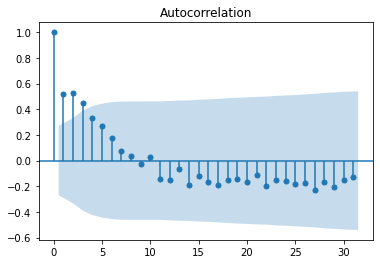

In [2]:
import pandas as pd
pd.Series.to_numpy(e.result[3].period_index)

e.result[4]
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(e.result[4], lags=31)
plt.show()

Import Apple Watch Health Data

In [8]:
import xml.etree.ElementTree as ET
# create element tree object
tree = ET.parse('apple_health_export/export.xml') 
# for every health record, extract the attributes
root = tree.getroot()


In [21]:

record_list = [x.attrib for x in root.iter('Record')]

# create DataFrame from a list (rows) of dictionaries (columns)
data = pd.DataFrame(record_list)

# proper type to dates
for col in ['creationDate', 'startDate', 'endDate']:
    data[col] = pd.to_datetime(data[col])

    # value is numeric, NaN if fails
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# some records do not measure anything, just count occurences
# filling with 1.0 (= one time) makes it easier to aggregate
data['value'] = data['value'].fillna(1.0)

# shorter observation names: use vectorized replace function
data['type'] = data['type'].str.replace('HKQuantityTypeIdentifier', '')
data['type'] = data['type'].str.replace('HKCategoryTypeIdentifier', '')

# save into feather as this is a more efficient data format
data.to_feather("/Users/thomasjensen/Documents/apple_export.ftr")


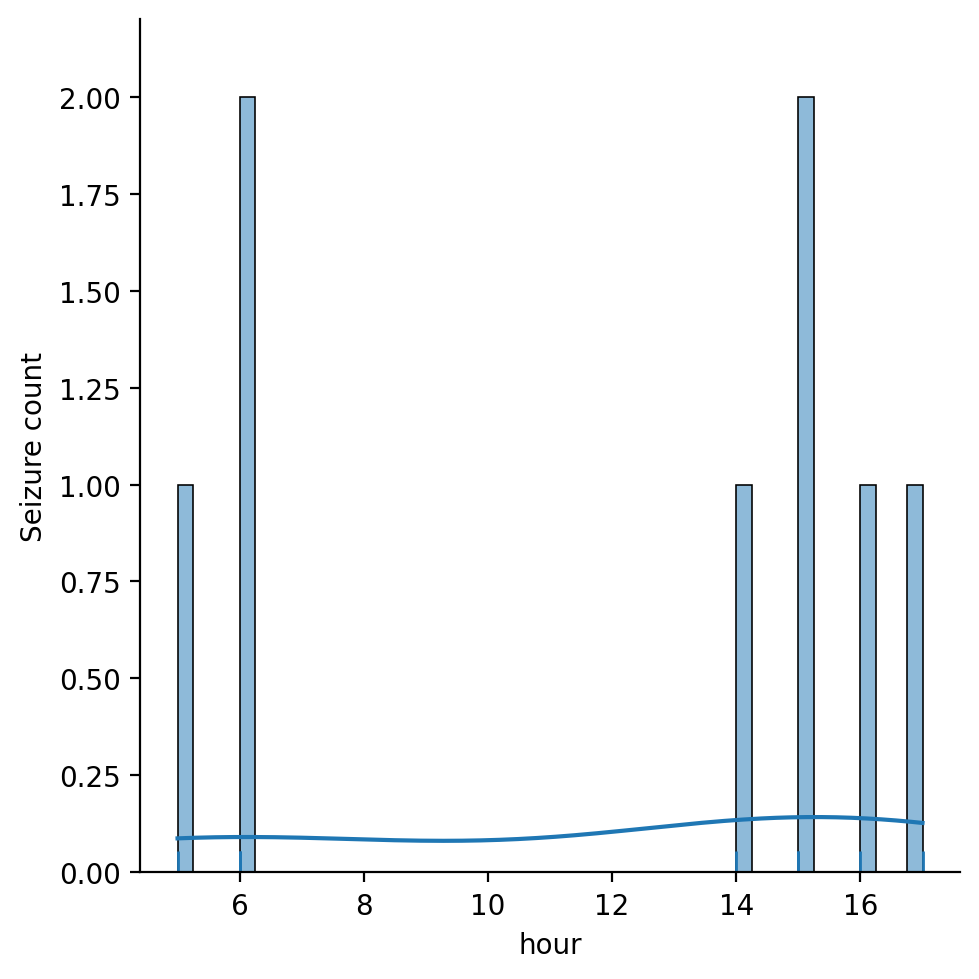

In [7]:
import seaborn as sns
ax1=sns.displot(data=e.result[1], 
            x='hour',
            rug=True,
            kind="hist",
            kde=True,
           bins=48)
ax1.set_ylabels(label='Seizure count')

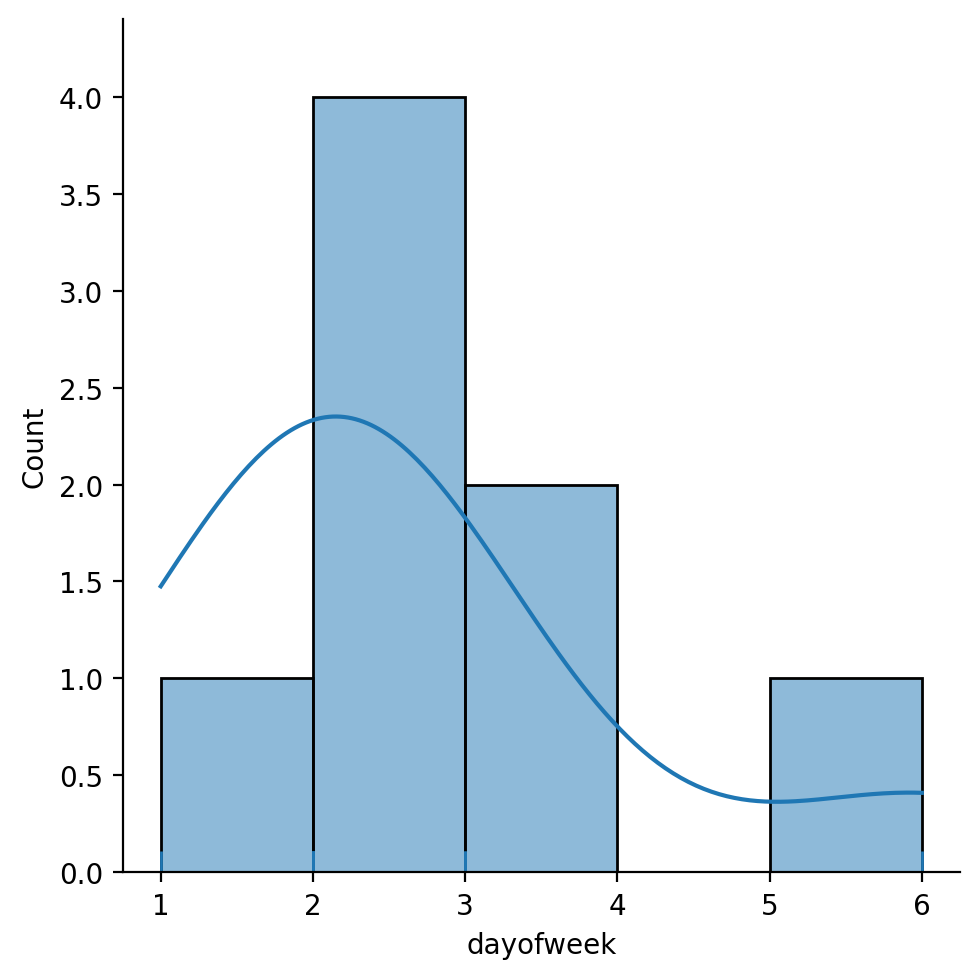

In [8]:
ax2=sns.displot(data=e.result[1], 
            x='dayofweek',
            rug=True,
            kind="hist",
           kde=True)